In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from Data import Cases, Polygons, Labels
from PImage import PIM

# configure the plot sizes
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
pimObj = PIM(2378, 8)
pimObj.readRGB()
pimObj.readFGmask()

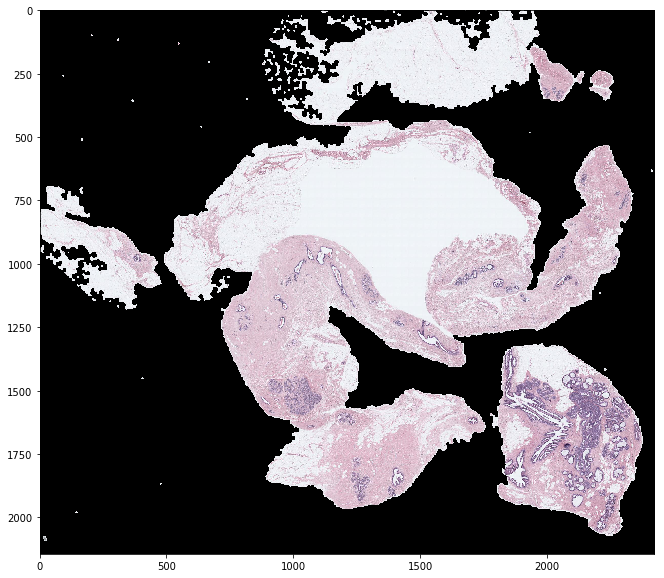

In [3]:
aux = pimObj.RGB.pim.copy()
aux[pimObj.FGmask.pmask == 0] = 0
plt.imshow(aux)
plt.show()

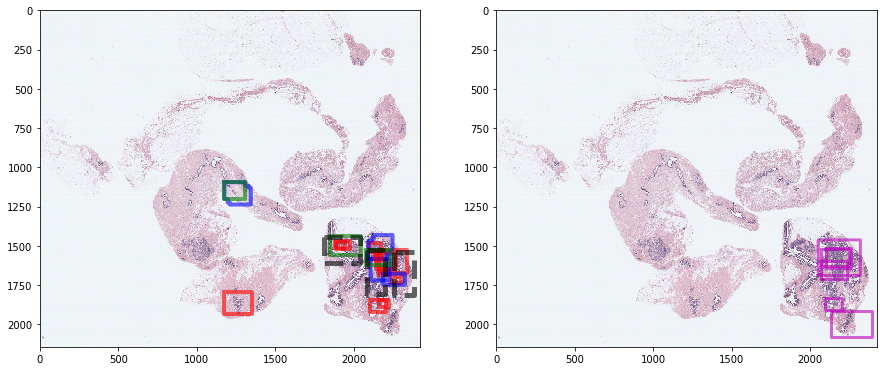

In [27]:
plt.subplot(121)
pimObj.showRGB()
pimObj.drawSoftROIs(expertID=[775,776,777],onlyEssentials=True)
pimObj.drawConsensusROIs()
# removed (not essential) polygons
plt.subplot(122)
pimObj.showRGB()
for softy in pimObj.SoftROIs:
    if not softy.isEssential:
        softy.draw(color='m', width=3)
plt.show()

In [28]:
numClasses = 4
for expID, expDiags in pimObj.ExpertDiagnoses.items():
    print(expDiags.toString(numClasses), ';', expDiags.diagnoses[numClasses])
print(pimObj.ConsensusDiagnoses.toString(numClasses), ';', pimObj.ConsensusDiagnoses.diagnoses[numClasses])

Expert775 Diagnoses: Benign without atypia ; [1 0 0 0]
Expert776 Diagnoses: Benign without atypia ; [1 0 0 0]
Expert777 Diagnoses: Benign without atypia ; [1 0 0 0]
Consensus Diagnoses: Benign without atypia ; [1 0 0 0]


In [29]:
print(pimObj.ConsensusDiagnoses.toString(14))
print(pimObj.ConsensusDiagnoses.diagnoses[14])

Consensus Diagnoses: UsualDuctalHyperplasia, ColumnarCellHyperplasiaColumnarCellChange
[0 0 0 1 1 0 0 0 0 0 0 0 0 0]


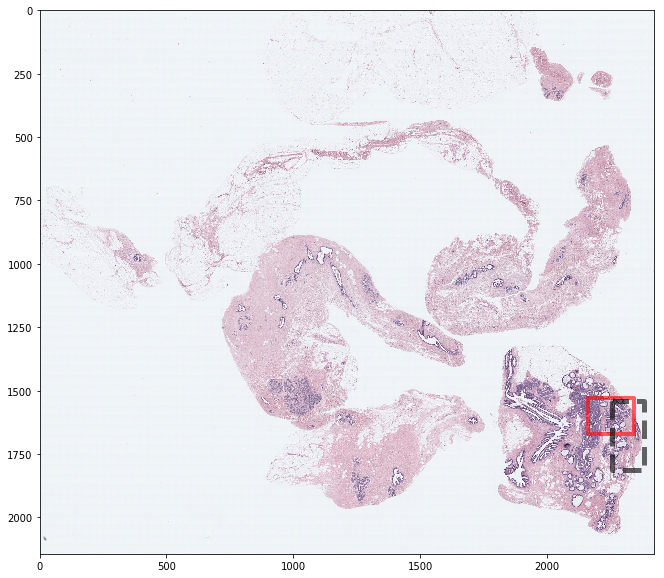

In [30]:
softy = pimObj.SoftROIs[2]
consy = pimObj.ConsensusROIs[2]
pimObj.showRGB()
softy.draw()
consy.draw()
plt.show()

In [31]:
softy_rgb  = softy.readFrom(pimObj.RGB.path)
softy_mask = softy.readFrom(pimObj.FGmask.path)
consy_rgb  = consy.readFrom(pimObj.RGB.path)
consy_mask = consy.readFrom(pimObj.FGmask.path)

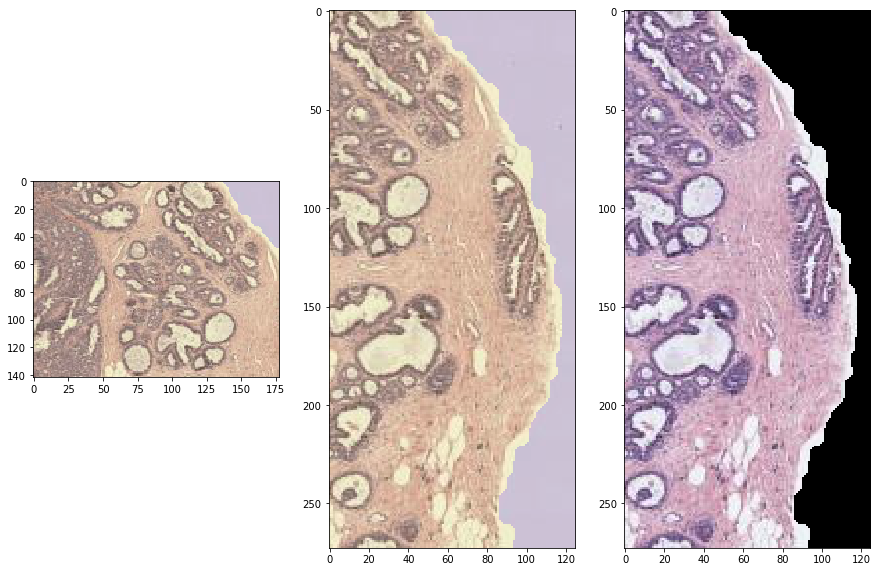

In [32]:
f, axs = plt.subplots(1, 3, sharey=False)
axs[0].imshow(softy_rgb,)
axs[0].imshow(softy_mask, alpha=0.2)
axs[1].imshow(consy_rgb,)
axs[1].imshow(consy_mask, alpha=0.2)
background = consy_mask == 0
consy_rgb[background] = 0
axs[2].imshow(consy_rgb)
plt.show()